# Logistic Regression & Model Evaluation
Objective: Learn classification, implement Logistic Regression for the Titanic dataset, and understand key evaluation metrics.
# Logistic Regression & Model Evaluation

## 1. Logistic Regression for Classification

While its name has "regression", Logistic Regression is a **classification** algorithm. It predicts the probability that an input belongs
to a certain class.

*   **How it works:** It passes the linear regression output (`w*x + b`) through a **Sigmoid function**, which squashes the value between 0 and 1.
*   **Output:** A probability. If the probability > 0.5, we classify it as class 1, otherwise class 0.


## 2. Model Evaluation for Classification

We can't use MSE for classification. We need different metrics:
*   **Confusion Matrix:** A table showing the performance of a classification model.
    *   **True Positive (TP):** Correctly predicted positive.
    *   **True Negative (TN):** Correctly predicted negative.
    *   **False Positive (FP):** Incorrectly predicted positive (Type I error).
    *   **False Negative (FN):** Incorrectly predicted negative (Type II error).
*   **Accuracy:** `(TP + TN) / (All Predictions)`. Good for balanced datasets.
*   **Precision:** `TP / (TP + FP)`. Of all the positive predictions, how many were correct? (Measures "exactness").
*   **Recall (Sensitivity):** `TP / (TP + FN)`. Of all the actual positives, how many did we find? (Measures "completeness").
*   **F1-Score:** The harmonic mean of Precision and Recall. `2 * (Precision * Recall) / (Precision + Recall)`. Great for imbalanced datasets.

In [5]:
## 3. Hands-On: Titanic Survival Prediction

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Load Data
df = sns.load_dataset('titanic')

print(df.head())

print(df.isnull().sum())


# Fill missing age with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing embarked with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop columns that are hard to use or have too many missing values
df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], axis=1, inplace=True)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

print("\nData after preprocessing:")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck      

C:\Users\minen\AppData\Local\Temp\ipykernel_20104\1026552406.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\minen\AppData\Local\Temp\ipykernel_20104\1026552406.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [8]:
X=df.drop('survived',axis=1)

y=df['survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#4. Train the logistic regression model
#we add a solver and increase max_iter to ensure converge

model=LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(X_train,y_train)
print("Model Training complete")

#5. Evaluate the model
y_pred=model.predict(X_test)

#Accuracy
acc=accuracy_score(y_test,y_pred)
print(f"\nAccuracy: {acc:.2f}")

#Detailed classification report 
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))


Model Training complete

Accuracy: 0.80

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



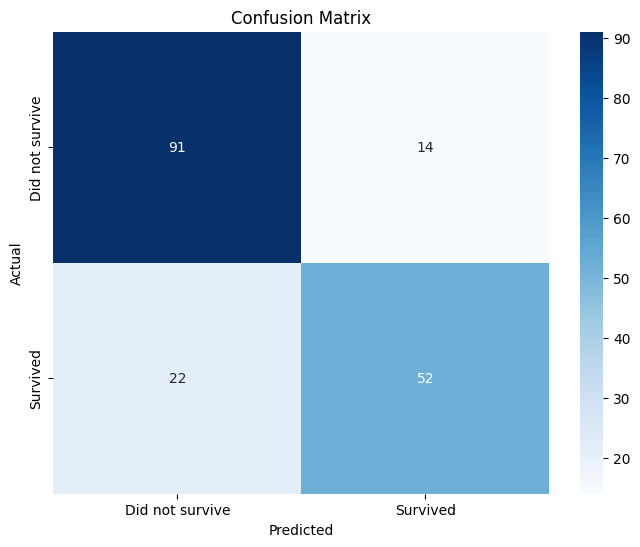

In [9]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Did not survive','Survived'],yticklabels=['Did not survive','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()